# Benchmark Information

## Notes
A corse-grained throughput estimation of inception_graphdef. The maximum throughput was 145.58133384834017 qps. It seems that in this case the bottleneck was the network connection.

## Client
### Machine type
custom (4 vCPUs, 14 GB memory)
### CPU platform
Intel Broadwell
### Zone
us-east4-c
### Command
`python3 benchmark.py -u 35.245.7.128 -m inception_graphdef --qps 100.0 --qps-delta 1.0 -f Dataset/ --sla 0.75 --percentile 95 --threads 4`

## Server
### Machine type
custom (6 vCPUs, 12 GB memory)
### CPU platform
Intel Broadwell
### GPUs
1 x NVIDIA Tesla P4
### Zone
us-east4-c

## General
### Dataset
5394 Images
### Model Config
```
name: "inception_graphdef"
platform: "tensorflow_graphdef"
max_batch_size: 128
input [
  {
    name: "input"
    data_type: TYPE_FP32
    format: FORMAT_NHWC
    dims: [ 299, 299, 3 ]
  }
]
output [
  {
    name: "InceptionV3/Predictions/Softmax"
    data_type: TYPE_FP32
    dims: [ 1001 ]
    label_filename: "inception_labels.txt"
  }
]
instance_group [
  {
    count: 1
    kind: KIND_GPU
    gpus: [ 0 ]
  }
]
dynamic_batching {
  preferred_batch_size: [ 4, 8 ]
  max_queue_delay_microseconds: 10000
}
```

## Import Libraries

In [0]:
from mlxtend.plotting import ecdf
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
plt.rcParams.update({'figure.max_open_warning': 0})

## Load Files

In [2]:
df = pd.read_csv("test_3_results.csv", header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5354,5355,5356,5357,5358,5359,5360,5361,5362,5363,5364,5365,5366,5367,5368,5369,5370,5371,5372,5373,5374,5375,5376,5377,5378,5379,5380,5381,5382,5383,5384,5385,5386,5387,5388,5389,5390,5391,5392,5393
55,0.040792,0.035472,0.063369,0.056370,0.049534,0.042894,0.070396,0.049510,0.062744,0.056919,0.076766,0.069904,0.057493,0.063732,0.084412,0.078541,0.071645,0.064931,0.085220,0.091865,0.077618,0.072246,0.122770,0.108718,0.115822,0.095007,0.075310,0.088749,0.100833,0.082489,0.117590,0.104829,0.110471,0.077500,0.098506,0.081410,0.091490,0.125023,0.127579,0.099522,...,0.436696,0.431405,0.442784,0.407571,0.427958,0.439961,0.422313,0.416102,0.402672,0.433443,0.395790,0.408380,0.432645,0.443810,0.404757,0.378045,0.424211,0.417994,0.391477,0.384440,0.424539,0.429300,0.368171,0.401864,0.417799,0.407969,0.362647,0.394972,0.413422,0.395387,0.400870,0.349610,0.390591,0.338165,0.357074,0.333988,0.355807,0.328782,0.321290,0.334270
56,0.041242,0.033165,0.056173,0.042318,0.062141,0.048264,0.068942,0.063443,0.055155,0.048734,0.070886,0.063856,0.076989,0.058069,0.085011,0.064548,0.071963,0.078608,0.114994,0.094597,0.067340,0.073669,0.088876,0.107484,0.100846,0.080593,0.087576,0.095725,0.081976,0.071838,0.125674,0.099539,0.118927,0.079065,0.092348,0.078126,0.112453,0.102792,0.108174,0.102310,...,0.533987,0.550914,0.523676,0.540215,0.567716,0.557568,0.538125,0.530726,0.520468,0.550300,0.545001,0.509404,0.499306,0.475939,0.510336,0.432826,0.461845,0.526675,0.468197,0.482885,0.467635,0.421635,0.460006,0.481688,0.435211,0.474150,0.454076,0.429110,0.471130,0.451784,0.464247,0.431034,0.423966,0.440884,0.407302,0.389734,0.413210,0.384941,0.402793,0.395108
57,0.041506,0.035800,0.050370,0.043383,0.063091,0.055919,0.063132,0.070397,0.057169,0.051089,0.078147,0.072265,0.064649,0.057411,0.078857,0.072233,0.086184,0.065763,0.115528,0.108274,0.094408,0.074731,0.068070,0.081475,0.101957,0.087599,0.109942,0.116882,0.104348,0.075399,0.096538,0.082017,0.069996,0.089280,0.106650,0.099833,0.120427,0.111171,0.093534,0.086851,...,0.524356,0.536638,0.512091,0.490176,0.530484,0.479582,0.506286,0.463140,0.512981,0.498653,0.491774,0.471096,0.476160,0.463536,0.505956,0.482550,0.469772,0.506148,0.498929,0.477173,0.396880,0.408708,0.430213,0.414411,0.418391,0.406684,0.445919,0.412196,0.389205,0.366776,0.360994,0.394574,0.405641,0.387300,0.364185,0.352381,0.344050,0.358994,0.377361,0.337596
58,0.035713,0.041126,0.056983,0.043824,0.063234,0.049962,0.064545,0.049791,0.070202,0.056772,0.078737,0.057758,0.065305,0.071671,0.071810,0.086374,0.079391,0.065057,0.108330,0.102455,0.082622,0.095201,0.068355,0.074866,0.115551,0.087941,0.111845,0.119381,0.098632,0.092229,0.084863,0.105330,0.078895,0.072284,0.108241,0.114217,0.088004,0.100725,0.081481,0.074881,...,0.588076,0.585615,0.575244,0.604334,0.528173,0.581864,0.551843,0.569355,0.576240,0.551256,0.568842,0.515112,0.526336,0.556363,0.532629,0.544605,0.557248,0.551731,0.538389,0.514164,0.545571,0.505995,0.527711,0.521334,0.534789,0.542161,0.552837,0.527982,0.509594,0.506187,0.497838,0.520163,0.539600,0.515702,0.545740,0.509585,0.495084,0.533109,0.527040,0.521102
59,0.040711,0.033741,0.055049,0.061309,0.047315,0.042082,0.072525,0.059238,0.066229,0.052553,0.080553,0.059873,0.066573,0.072633,0.080818,0.087535,0.074514,0.066651,0.111201,0.116162,0.097293,0.104203,0.076313,0.069962,0.090808,0.083873,0.119162,0.092249,0.071748,0.105527,0.097853,0.078999,0.111005,0.085799,0.114634,0.107042,0.119991,0.074205,0.086879,0.093921,...,0.592920,0.579757,0.605641,0.586592,0.574339,0.562293,0.568513,0.600706,0.609323,0.604912,0.565208,0.598507,0.557731,0.551773,0.571567,0.577561,0.579704,0.585675,0.593772,0.572002,0.524516,0.553705,0.542047,0.567222,0.491574,0.513255,0.557135,0.461784,0.571739,0.508713,0.484000,0.479185,0.504946,0.510789,0.487757,0.499559,0.470746,0.493539,0.459115,0.476754


## Generate ECDF

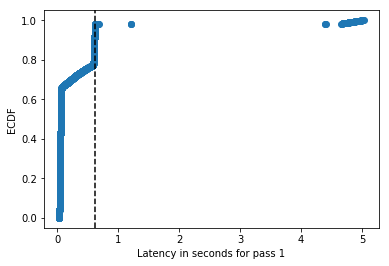

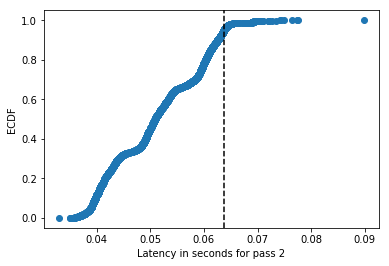

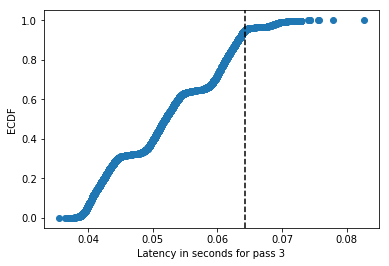

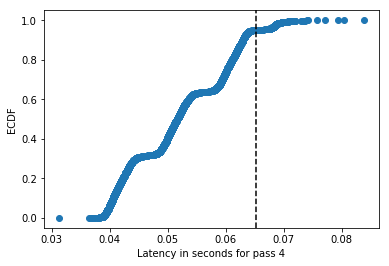

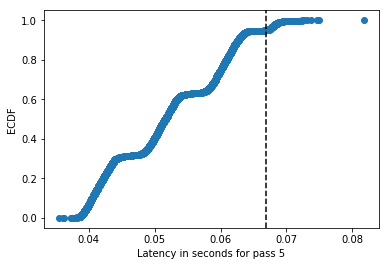

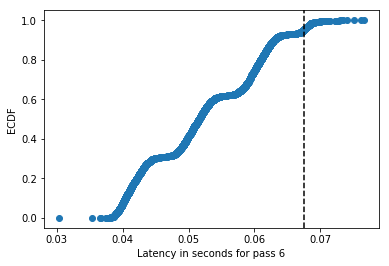

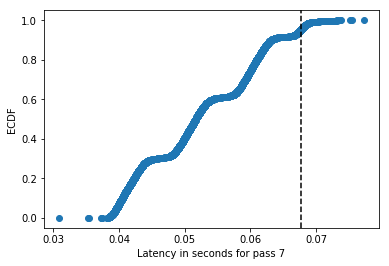

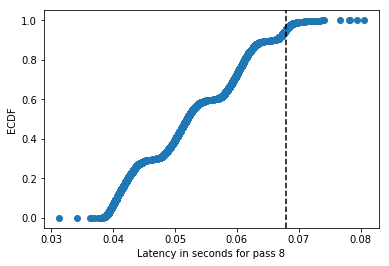

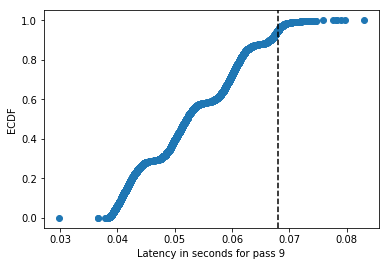

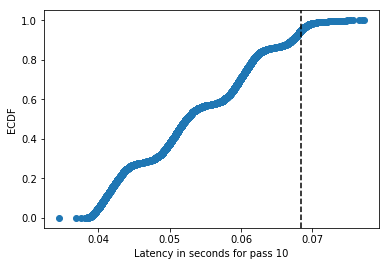

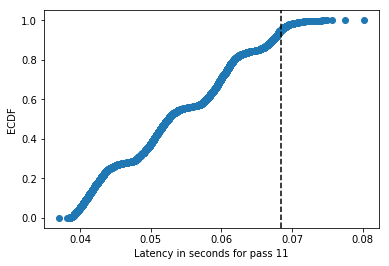

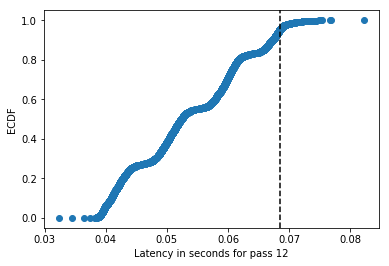

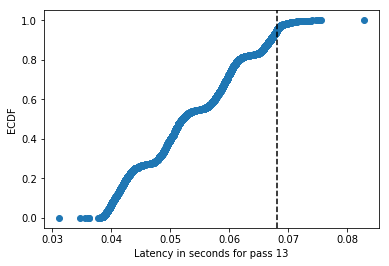

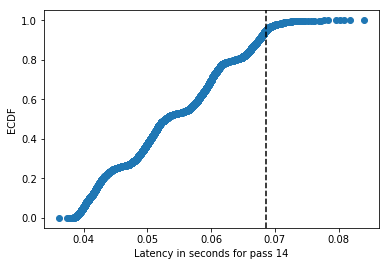

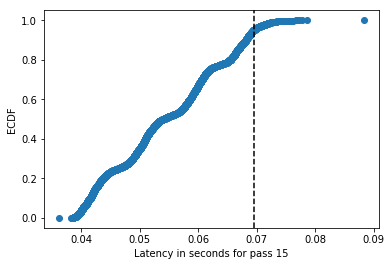

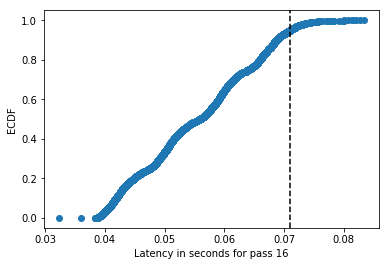

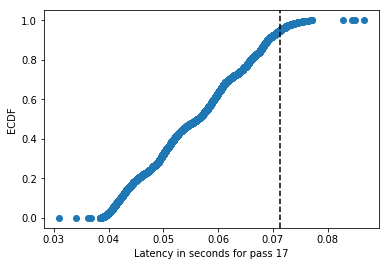

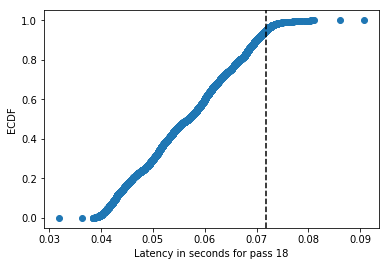

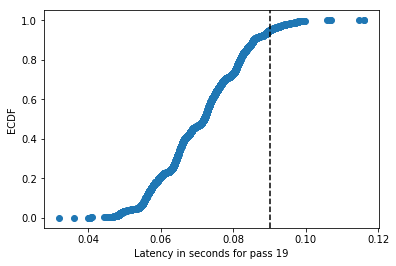

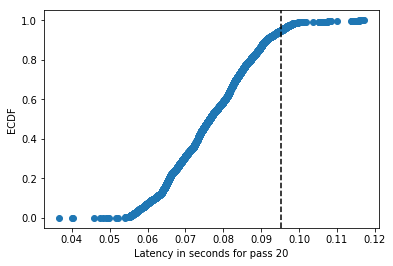

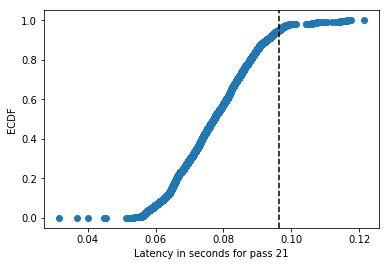

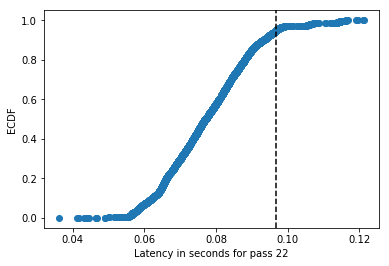

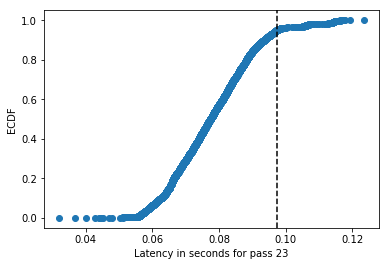

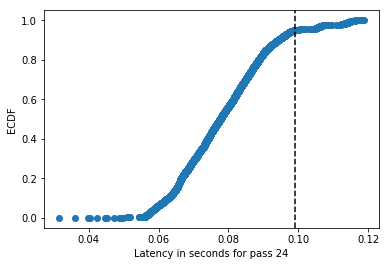

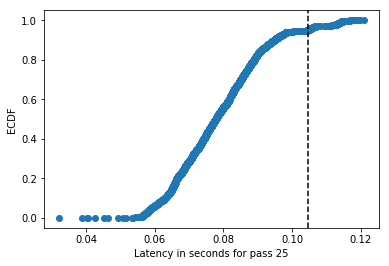

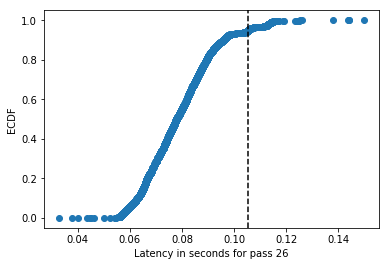

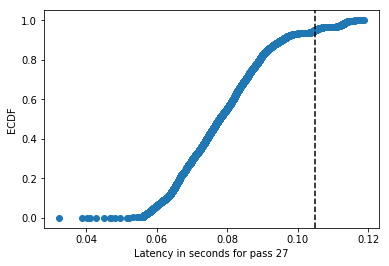

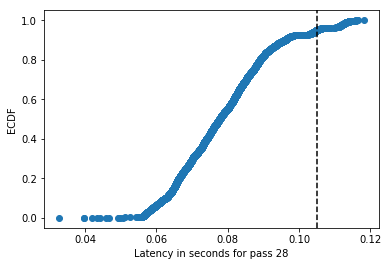

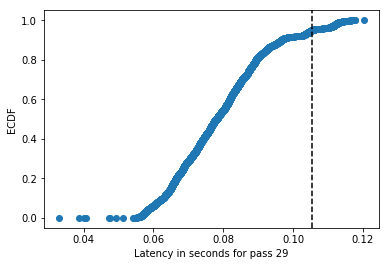

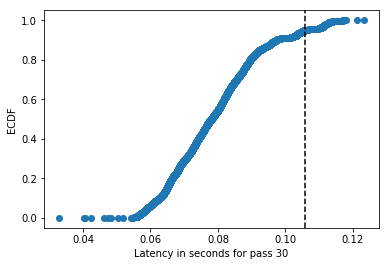

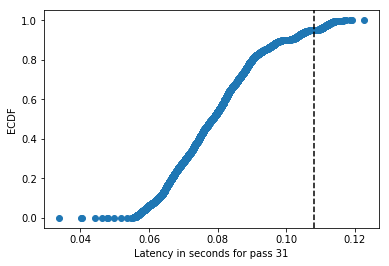

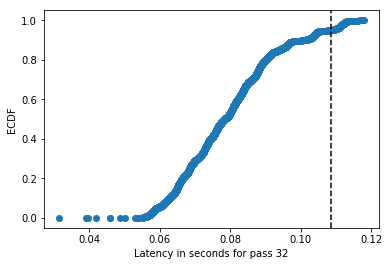

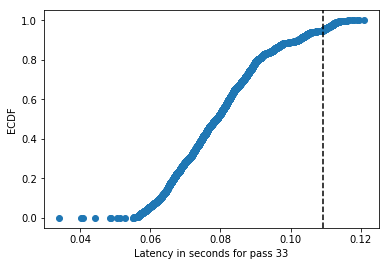

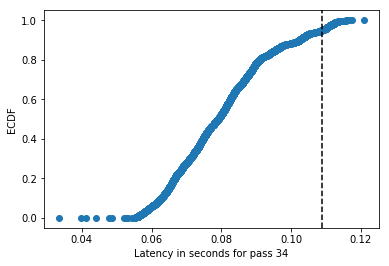

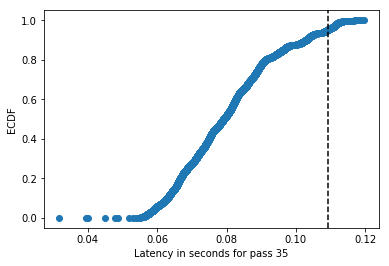

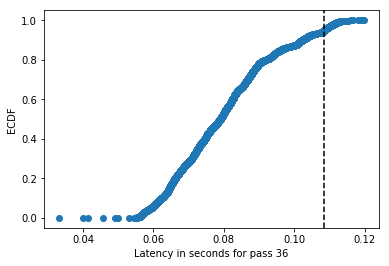

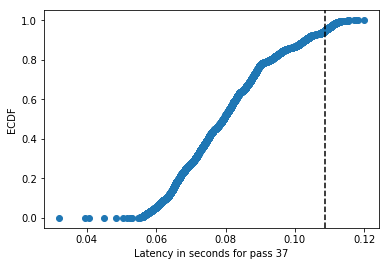

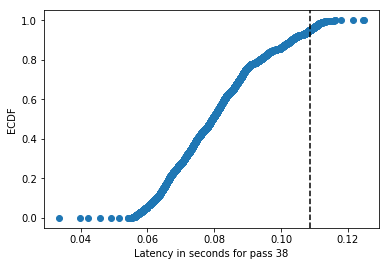

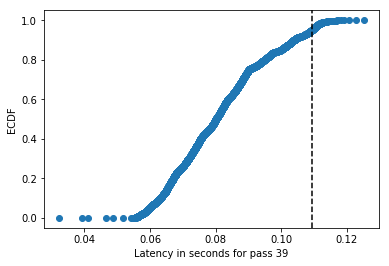

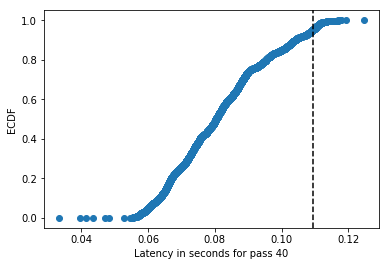

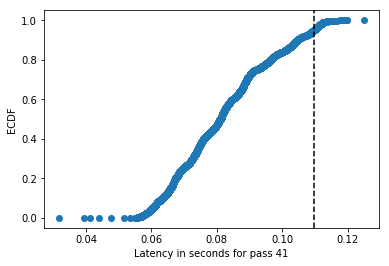

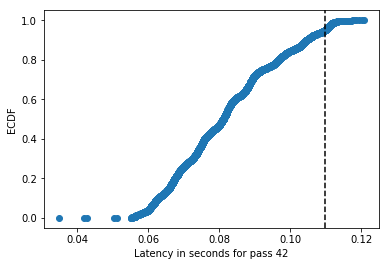

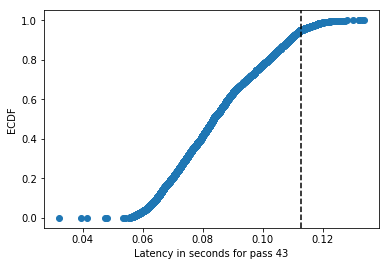

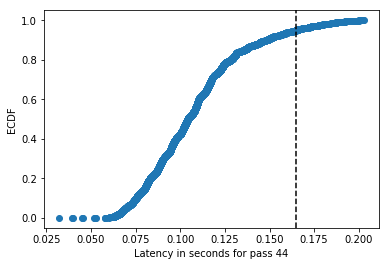

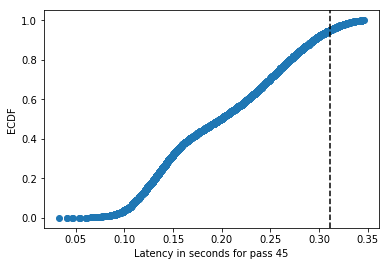

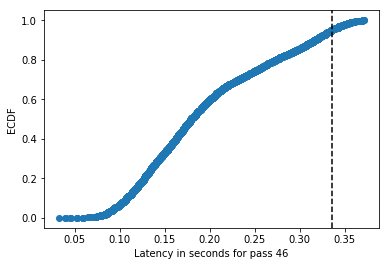

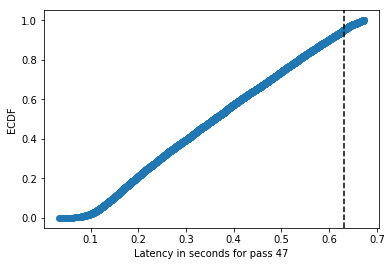

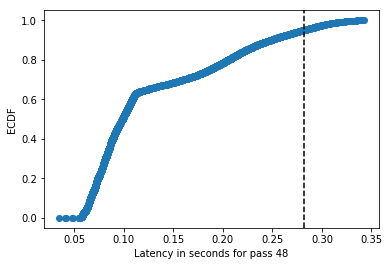

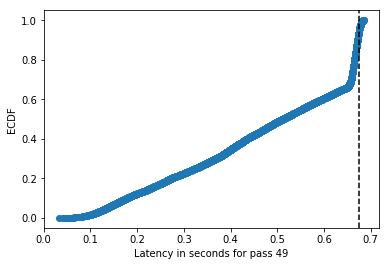

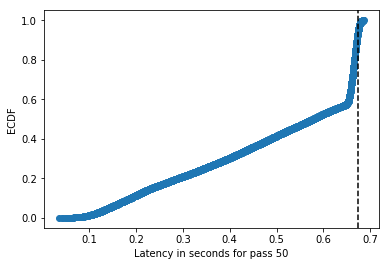

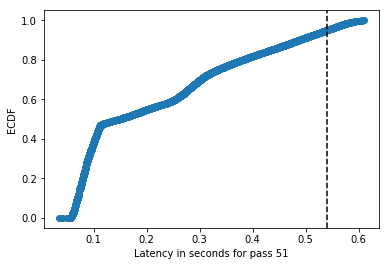

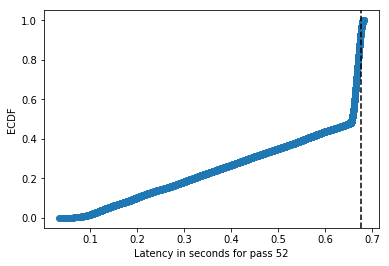

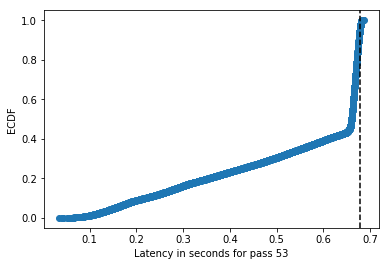

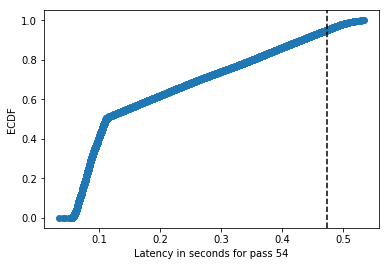

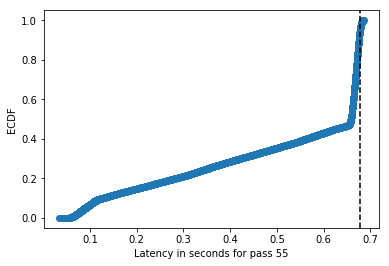

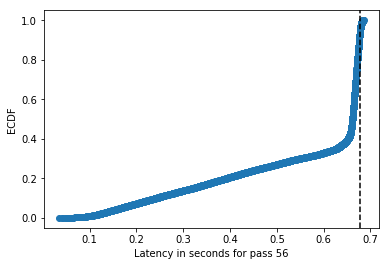

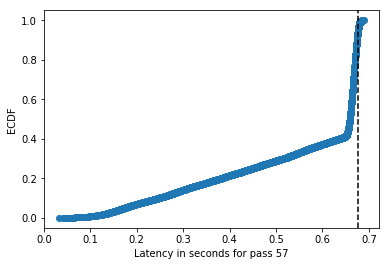

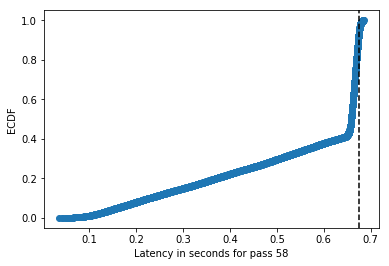

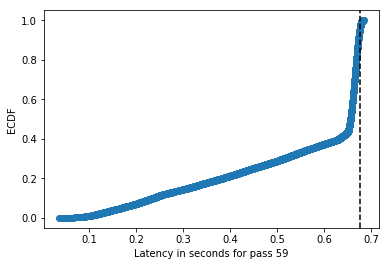

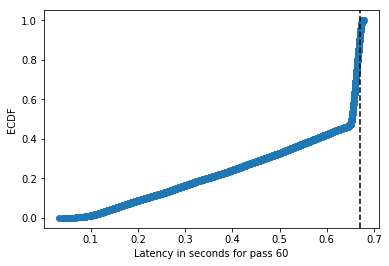

In [3]:
for index, row in df.iterrows():
    plt.figure()
    ecdf(x=list(row), x_label='Latency in seconds for pass ' + str(index + 1), percentile=0.95)